## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
study_mouse_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how ='outer')
study_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
mice_count = study_mouse_df["Mouse ID"].count()
print(mice_count)

1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = study_mouse_df[study_mouse_df.duplicated(["Mouse ID"])]
#print("Duplicate rows based on Mouse ID:", duplicate_mice_df)
duplicate_mice_df = duplicate_mice_df.loc[:,["Mouse ID","Timepoint"]]
print(duplicate_mice_df)

     Mouse ID  Timepoint
1        k403          5
2        k403         10
3        k403         15
4        k403         20
5        k403         25
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1644 rows x 2 columns]


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = study_mouse_df[study_mouse_df.duplicated(["Mouse ID"])]
#print("Duplicate rows based on Mouse ID:", duplicate_mice_df)
duplicate_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [7]:
#Checking duplicate rows
duplicate_mouse=study_mouse_df.loc[study_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [8]:
#Looking at data for mouse g989
study_mouse_df.loc[study_mouse_df["Mouse ID"]=='g989'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study_mouse_df.drop_duplicates(subset="Mouse ID")
clean_study_mouse_df = study_mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint"]).copy()
clean_study_mouse_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor_Volume','Drug Regimen': 'Drug', 'Weight (g)': 'Weight'}, inplace = True)
clean_study_mouse_df.head()

,Mouse ID,Drug,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
#Compare clean data frame to first
#clean_study_mouse_df.loc[clean_study_mouse_df["Mouse ID"]=='g989'].head()

In [11]:
#Compare the number of rows
#print(len(study_mouse_df))
#print(len(clean_study_mouse_df))

In [12]:
# Checking the number of mice in the clean DataFrame.
#study_mouse_df.drop_duplicates(subset="Mouse ID").count()
#study_mouse_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor_Volume','Drug Regimen': 'Drug', 'Weight (g)': 'Weight'}, inplace = True)
#print(study_mouse_df.columns)
#print(study_mouse_df.count)
#study_mouse_df.drop_duplicates(subset="Mouse ID").count().unique()
#study_mouse_df.drop_duplicates(subset="Mouse ID").count()

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
#  https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=statistics
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#  https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=variance
tumor_mean = clean_study_mouse_df.groupby("Drug").mean()["Tumor_Volume"]
#print("Tumor Volume Mean")
#print(tumor_mean)
tumor_median = clean_study_mouse_df.groupby("Drug").median()["Tumor_Volume"]
#print("Tumor Volume Median")
#print(timor_median)
tumor_variance = clean_study_mouse_df.groupby("Drug").var()["Tumor_Volume"]
#print("Tumor Volume Variance")
#print(tumor_variance)
tumor_standard_deviation = clean_study_mouse_df.groupby("Drug").std()["Tumor_Volume"]
#print("Tumor Volume Standard Deviation")
#print(tumor_standard_deviation)
tumor_standard_error_of_mean = clean_study_mouse_df.groupby("Drug").sem()["Tumor_Volume"]
#print("Tumor Volume Standard Error of Mean ")
#print(tumor_standard_error_of_mean )

In [14]:
tumor_volume_summary = pd.DataFrame({
                                        "Tumor Volume Mean":tumor_mean,
                                       "Tumor Volume Median":tumor_median,
                                       "Tumor Volume Variance":tumor_variance,
                                      "Tumor Volume Standard Deviation": tumor_standard_deviation,
                                        "Tumor Volume Standard Error of Mean":tumor_standard_error_of_mean})
tumor_volume_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

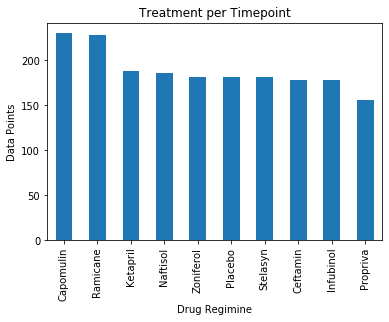

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas. 
#study_mouse_df.groupby("Drug")["Timepoint"].count()
drug_counts = clean_study_mouse_df["Drug"].value_counts()
#print(drug_counts)
drug_counts.plot(kind="bar")
plt.title("Treatment per Timepoint")
plt.xlabel("Drug Regimine")
plt.ylabel("Data Points");

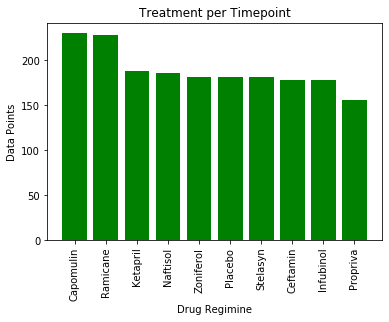

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.
drug_counts = clean_study_mouse_df["Drug"].value_counts()
plt.bar(drug_counts.index, drug_counts, color ='g', align = "center")
plt.xticks(rotation=90)
plt.title("Treatment per Timepoint")
plt.xlabel("Drug Regimine")
plt.ylabel("Data Points");

In [17]:
#to see everything in the index
drug_counts.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

## Pie Plots

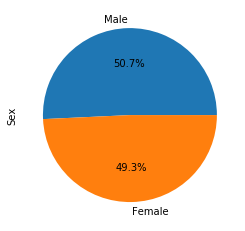

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_study_mouse_df["Sex"].value_counts()
sex.plot(kind="pie",autopct = "%1.1f%%");

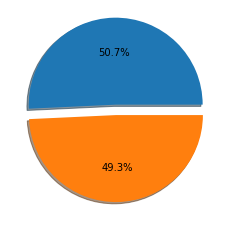

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ["Male", "Female"]
sex = clean_study_mouse_df["Sex"].value_counts()
#print(sex)
explode = (0.12, 0)
plt.pie(sex, explode = explode, autopct = "%1.1f%%", shadow = True);
#plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment 
#regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
top_drug_regimines = clean_study_mouse_df[clean_study_mouse_df["Drug"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#print(top_drug_regimines)
top_drug_regimines_data = top_drug_regimines[["Drug", "Mouse ID", "Timepoint", "Weight", "Tumor_Volume"]]
#print(top_drug_regimines_data)
#print(top_drug_regimines_data.count())


In [21]:
#used to compare
#max_tumor_mouse.info()

In [22]:
#used to compare
#max_tumor_mouse_merge.info()

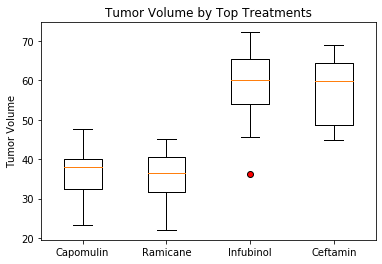

The lower quartile of tumor volume  is: Timepoint           20.000000
Age_months           6.000000
Weight              25.000000
Tumor_Volume        45.934712
Metastatic Sites     1.000000
Name: 0.25, dtype: float64
The upper quartile of tumor volume is: Timepoint           45.000000
Age_months          19.000000
Weight              29.000000
Tumor_Volume        64.957562
Metastatic Sites     3.000000
Name: 0.75, dtype: float64
The interquartile range of tumor volume is: Timepoint           25.00000
Age_months          13.00000
Weight               4.00000
Tumor_Volume        19.02285
Metastatic Sites     2.00000
dtype: float64
The the median of tumor volume is: Timepoint           45.00000
Age_months          13.00000
Weight              27.00000
Tumor_Volume        55.84141
Metastatic Sites     1.00000
Name: 0.5, dtype: float64 
Values below Timepoint          -17.500000
Age_months         -13.500000
Weight              19.000000
Tumor_Volume        17.400438
Metastatic Sites    -2.

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#https://www.geeksforgeeks.org/python-pandas-series-last/
max_tumor_mouse = clean_study_mouse_df.groupby(["Mouse ID"]).max()
max_tumor_mouse.reset_index(inplace=True)
max_tumor_mouse_merge=max_tumor_mouse[["Mouse ID","Timepoint"]].merge(clean_study_mouse_df, on=["Mouse ID","Timepoint"], how = "left")
capomulin=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Capomulin"]["Tumor_Volume"]
ramicane=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Ramicane"]["Tumor_Volume"]
infubinol=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Infubinol"]["Tumor_Volume"]
ceftamin=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Ceftamin"]["Tumor_Volume"]
#top_drug_regimines_df = top_drug_regimines_data.groupby(["Drug", "Mouse ID"]).mean()["Tumor_Volume"]
#top_drug_regimines_df
#create a list of top drugs
top_drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#tumor_value_final = top_drug_regimines_data.groupby("Drug")["Tumor_Volume"].mean()
#print(tumor_value_final)
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Top Treatments")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = top_drug_treatments, flierprops = {"markerfacecolor": "red"})

#plt.boxplot(tumor_value_final, patch_artist=True, labels = "top_drug_treatments")
plt.show()

#capomulin_quartiles = max_tumor_mouse_merge.quantile([0.25,0.5,0.75])
capomulin_lowerq = max_tumor_mouse_merge.quantile(0.25)
capomulin_upperq = max_tumor_mouse_merge.quantile(0.75)
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of tumor volume  is: {capomulin_lowerq}")
print(f"The upper quartile of tumor volume is: {capomulin_upperq}")
print(f"The interquartile range of tumor volume is: {capomulin_iqr}")
print(f"The the median of tumor volume is: {max_tumor_mouse_merge.quantile(0.5)} ")

lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [25]:
ramicane_quartiles = max_tumor_mouse_merge.quantile([0.25,0.5,0.75])
ramicane_lowerq =ramicane_quartiles.loc[ 0.25] 
ramicane_upperq = max_tumor_mouse_merge.quantile(0.75)
ramicane_iqr = ramicane_upperq-ramicane_lowerq
# print(f"The lower quartile of tumor volume  is: {ramicane_lowerq}")
# print(f"The upper quartile of tumor volume is: {ramicane_upperq}")
# print(f"The interquartile range of tumor volume is: {ramicane_iqr}")

# lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
# upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [27]:
infubinol_quartiles = max_tumor_mouse_merge.quantile([0.25,0.5,0.75])
infubinol_lowerq =infubinol_quartiles.loc[ 0.25] 
infubinol_upperq = max_tumor_mouse_merge.quantile(0.75)
infubinol_iqr = infubinol_upperq-infubinol_lowerq
# print(f"The lower quartile of tumor volume  is: {infubinol_lowerq}")
# print(f"The upper quartile of tumor volume is: {infubinol_upperq}")
# print(f"The interquartile range of tumor volume is: {infubinol_iqr}")

# lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
# upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [31]:
ceftamin_quartiles = max_tumor_mouse_merge.quantile([0.25,0.5,0.75])
ceftamin_lowerq =ceftamin_quartiles.loc[ 0.25] 
ceftamin_upperq = max_tumor_mouse_merge.quantile(0.75)
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
# print(f"The lower quartile of tumor volume  is: {ceftamin_lowerq}")
# print(f"The upper quartile of tumor volume is: {ceftamin_upperq}")
# print(f"The interquartile range of tumor volume is: {ceftamin_iqr}")

# lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
# upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [29]:
#looking at the tumor volume to see if it changed
#max_tumor_mouse.head()

## Line and Scatter Plots

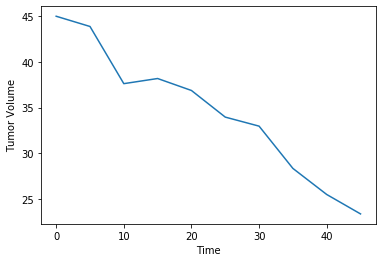

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#weight = study_mouse_df.groupby(["Weight"])[study_mouse_df.groupby(["Weight"])["Tumor_Volume"].mean()]
capomulin = clean_study_mouse_df.loc[clean_study_mouse_df["Drug"]=="Capomulin"]
capomulin.head()
mouse_data =capomulin.loc[capomulin["Mouse ID"]=="s185"]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor_Volume"]);
plt.xlabel("Time")
plt.ylabel("Tumor Volume");

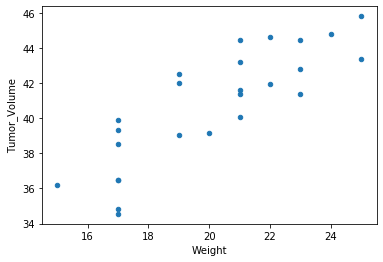

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin_scatter = clean_study_mouse_df.loc[study_mouse_df["Drug"]=="Capomulin"]
capomulin_mean = capomulin.groupby(["Mouse ID"]).mean()
#print(capomulin_mean)
#capomulin_scatter = max_tumor_mouse_merge[max_tumor_mouse_merge["Drug"].isin(["capomulin"])]
#print(capomulin_scatter)
#capomulin_scatter_df = top_drug_regimines_data[["Mouse ID", "Weight", "Tumor_Volume"]]
#print(capomulin_scatter_df)
#capomulin_scatter_weight = capomulin_scatter_df.groupby("Weight")["Tumor_Volume"].mean()
#print(capomulin_scatter_weight)
capomulin_scatter = capomulin_mean.plot(kind = "scatter", x="Weight", y="Tumor_Volume")

## Correlation and Regression

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


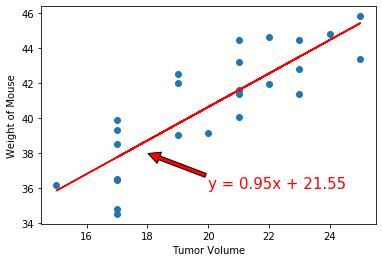

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean["Weight"]
y_values = capomulin_mean["Tumor_Volume"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(18,38), xytext=(20,36),fontsize=15,color="red", arrowprops=dict(facecolor="red", shrink = .01))
print(line_eq)
plt.xlabel('Tumor Volume')
plt.ylabel('Weight of Mouse')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#OBSERVATIONS
# The drug, capomulin, is effective in reducing the size of the tumor in mice. That is evident in the line graph above. 
# The boxplot shows that infubinol has an outlier. This could be due to a mis-measuremnt on the tumor volume. 
# I worked with my tutor and he helped me with the quartiles. We worked through the benefit of using loc in this type of code. 
# Evaluating the quartiles shows that other drug regimines could have outliers.
# The line graph shows a significant drop in tumor size over a certain time period. But this represents one mouse.
# The r-value is below 1 but above 0.5, this leads me to belive that there is a correlation between the weight of the mouse and the size of the tumor. 
# We had some time at the end of the tutor session to go over the regression line and figured out how to get arrows. 
